Benin Summary Statistics:
                Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525

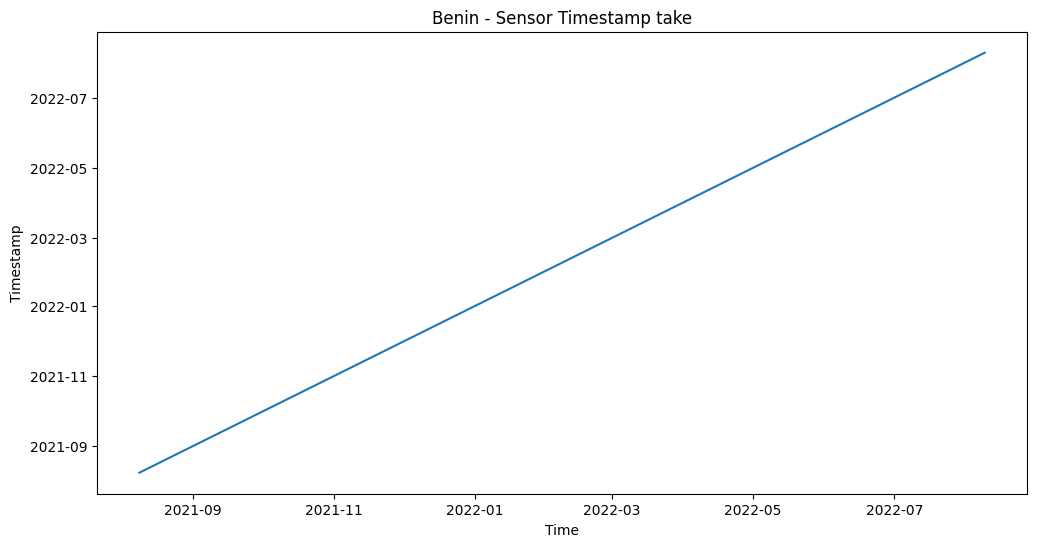

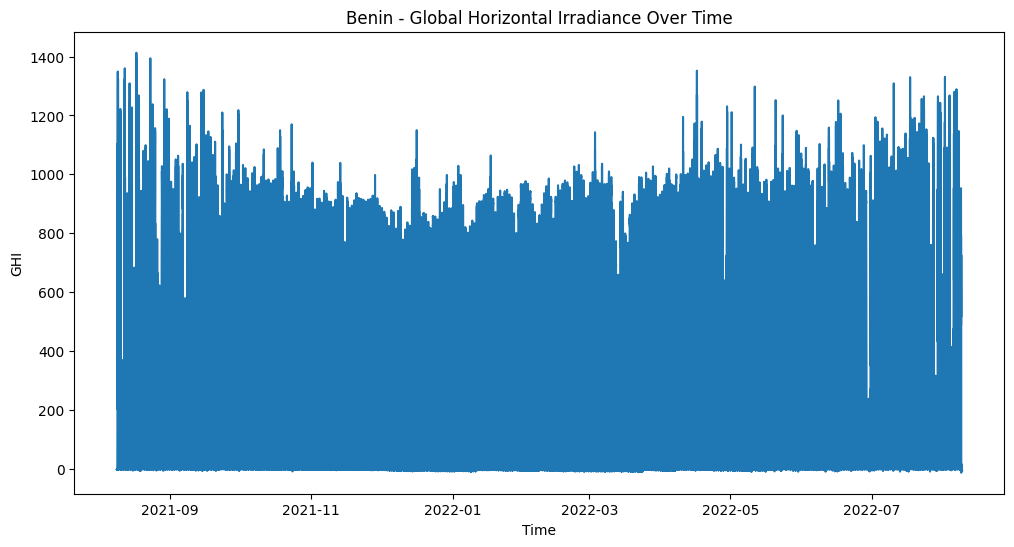

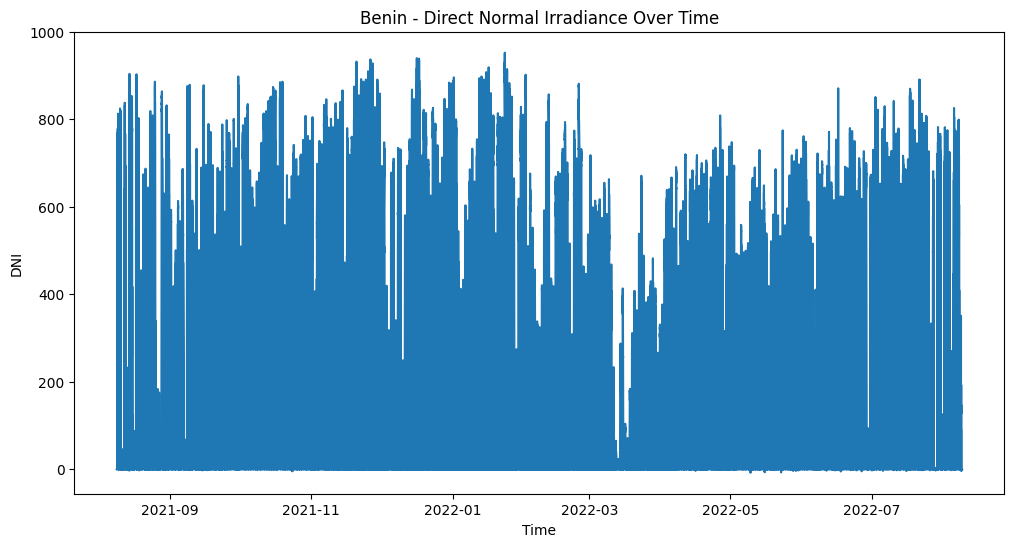

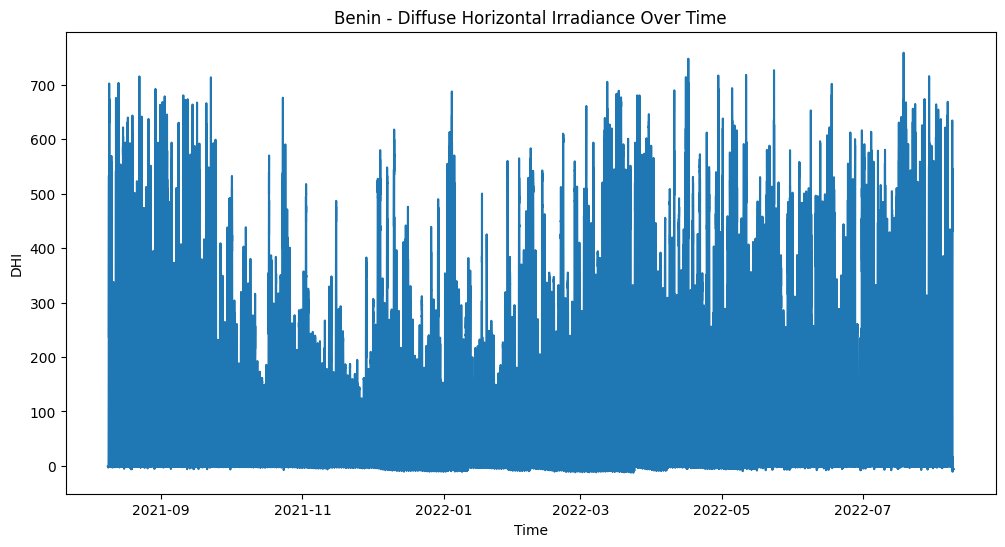

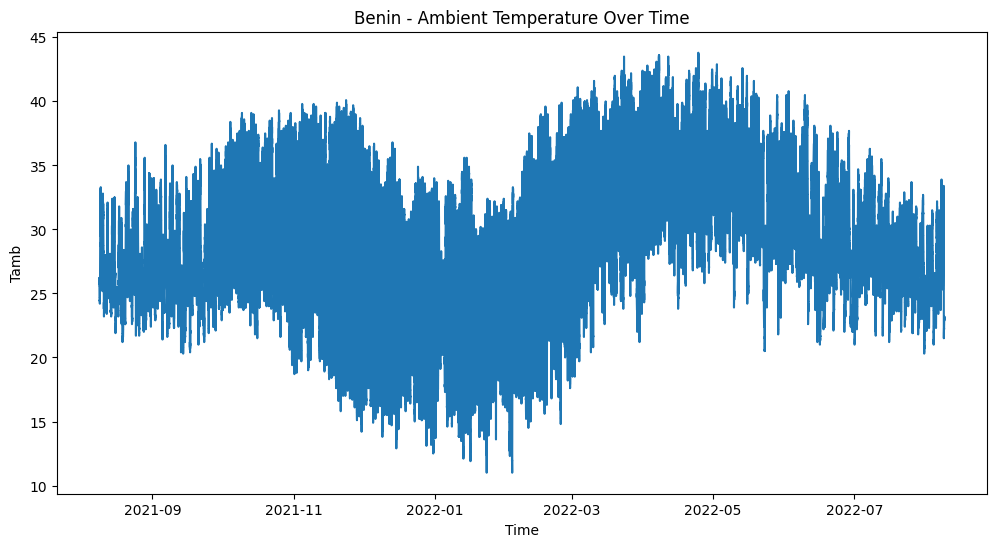

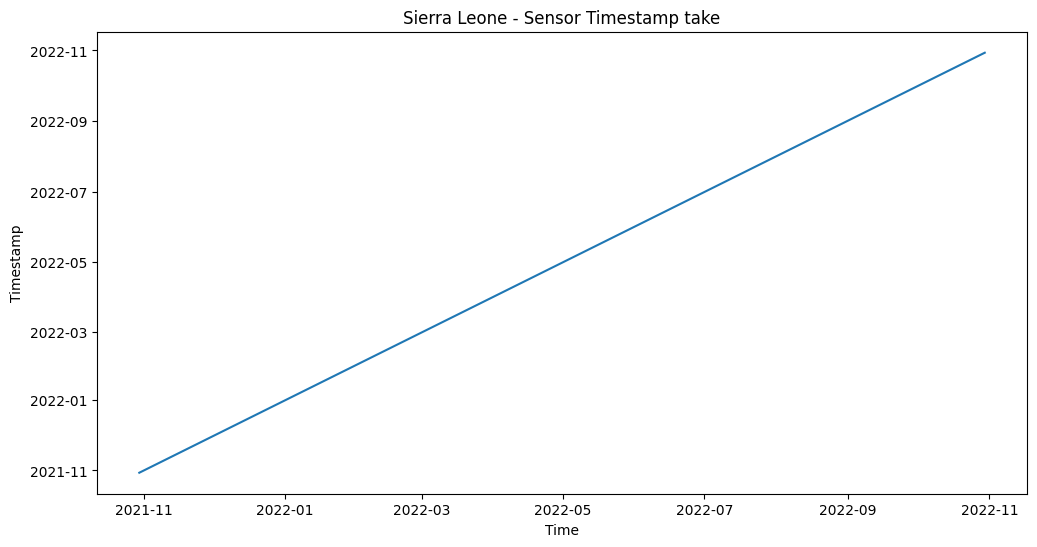

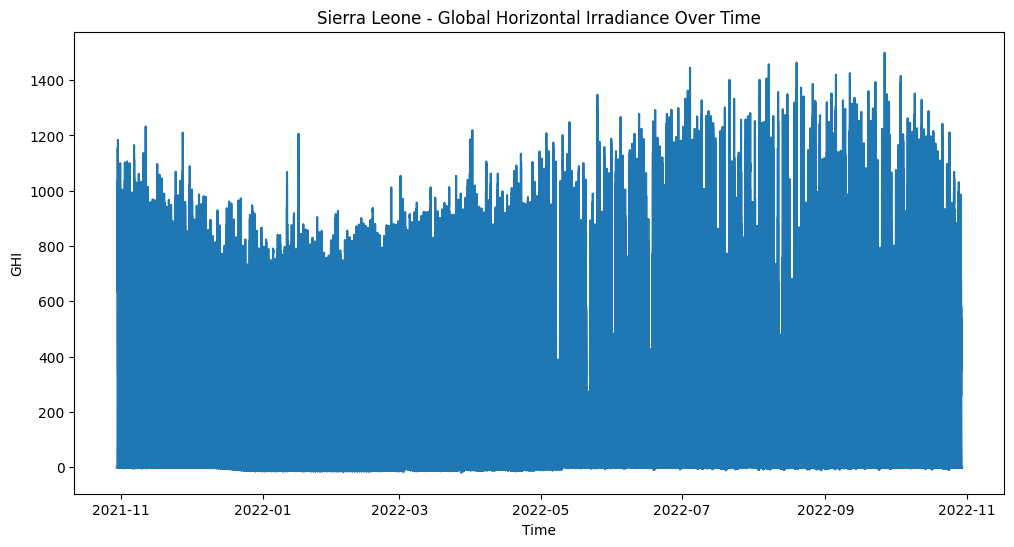

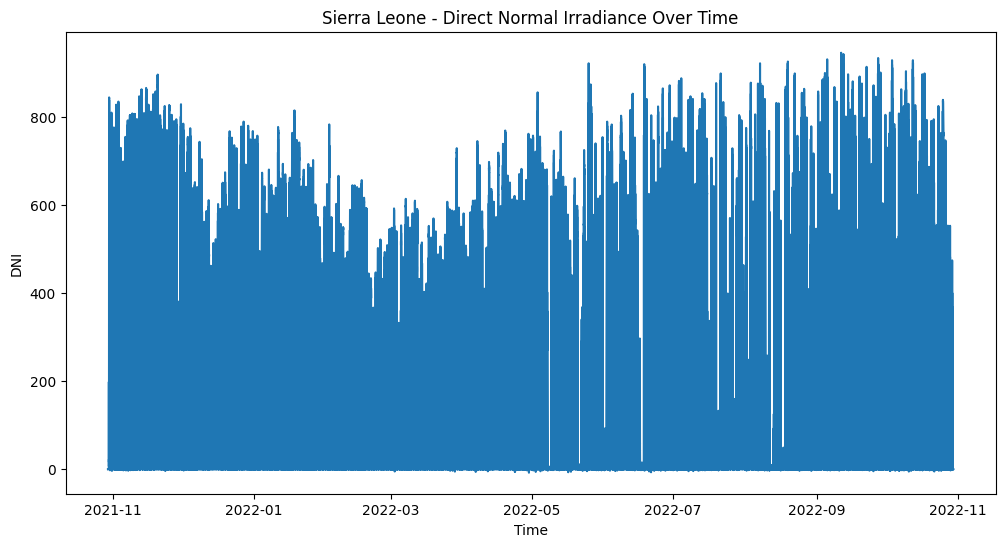

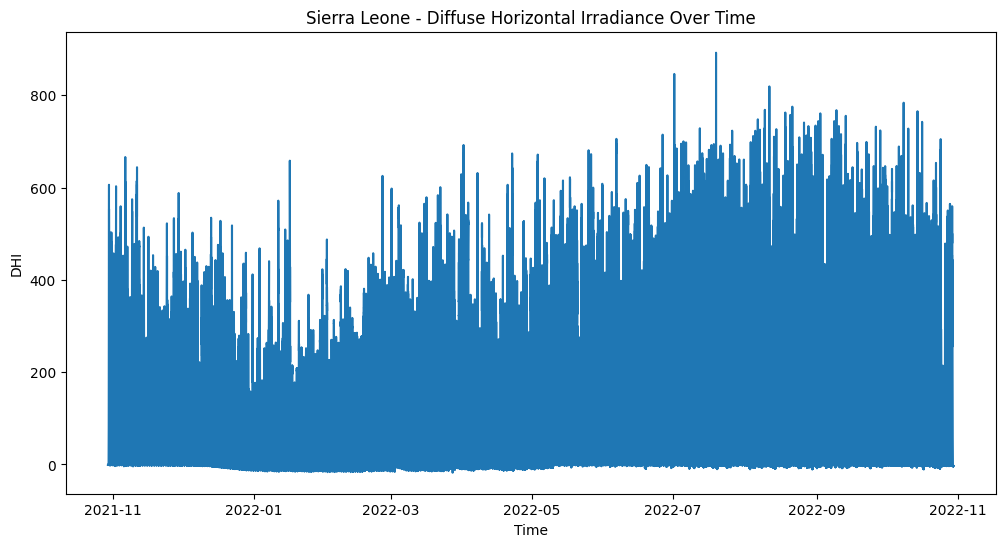

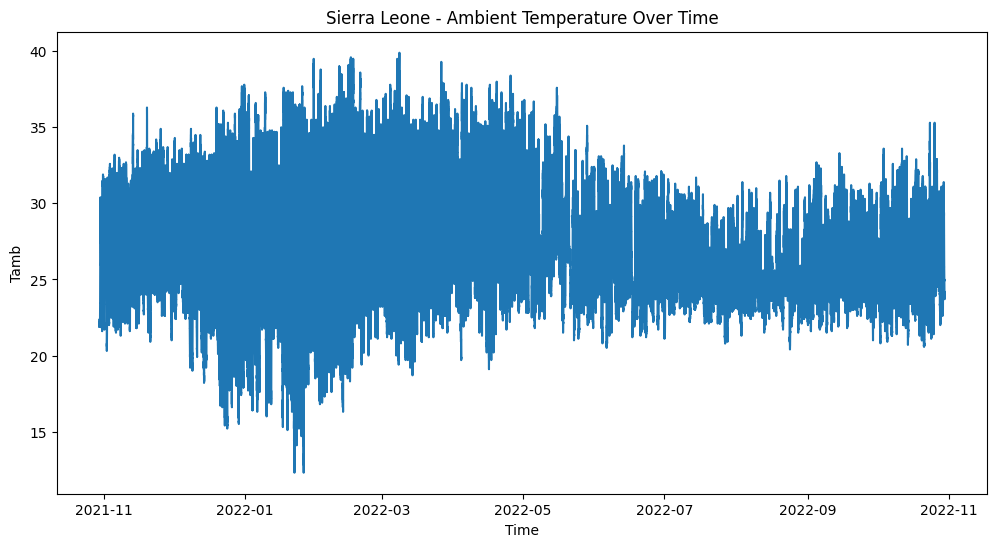

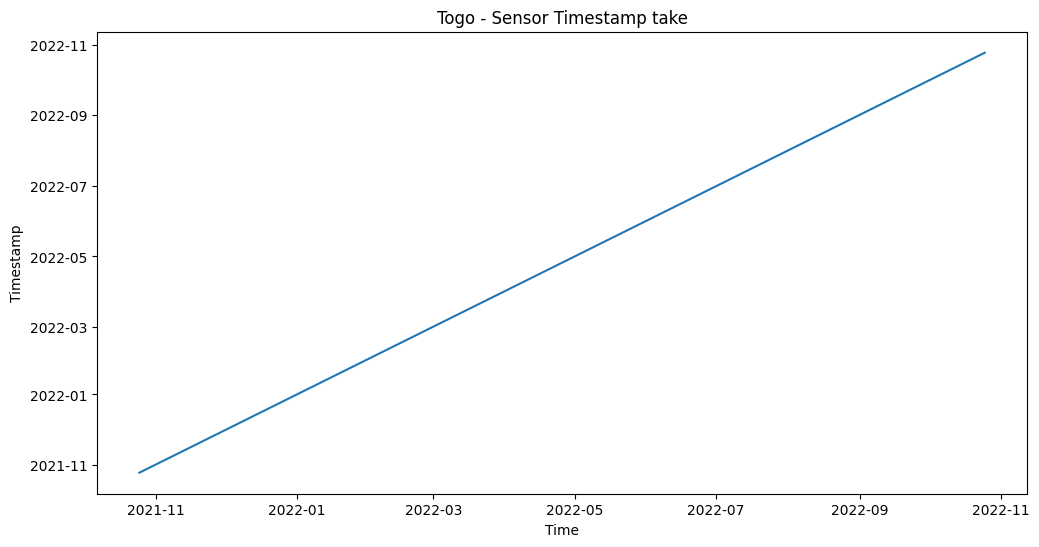

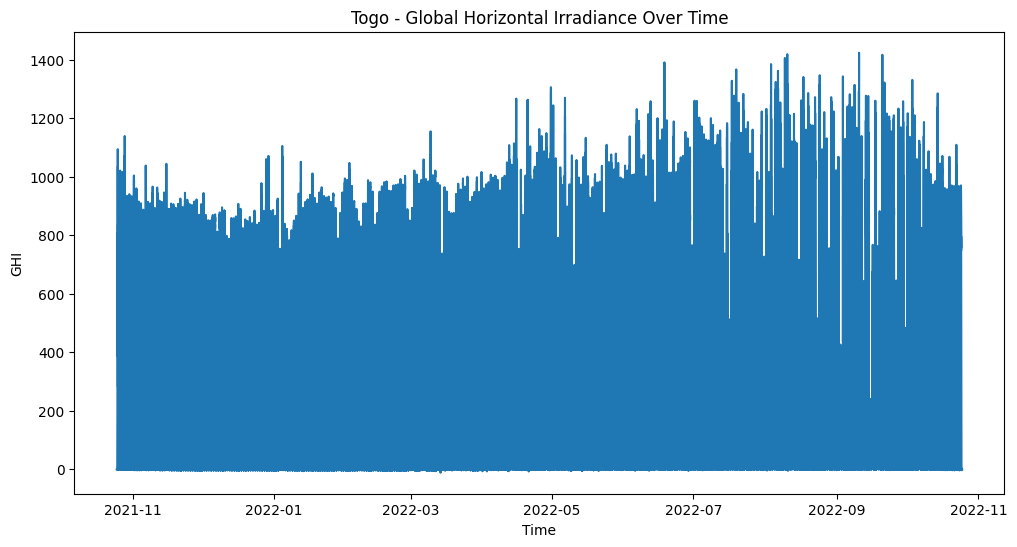

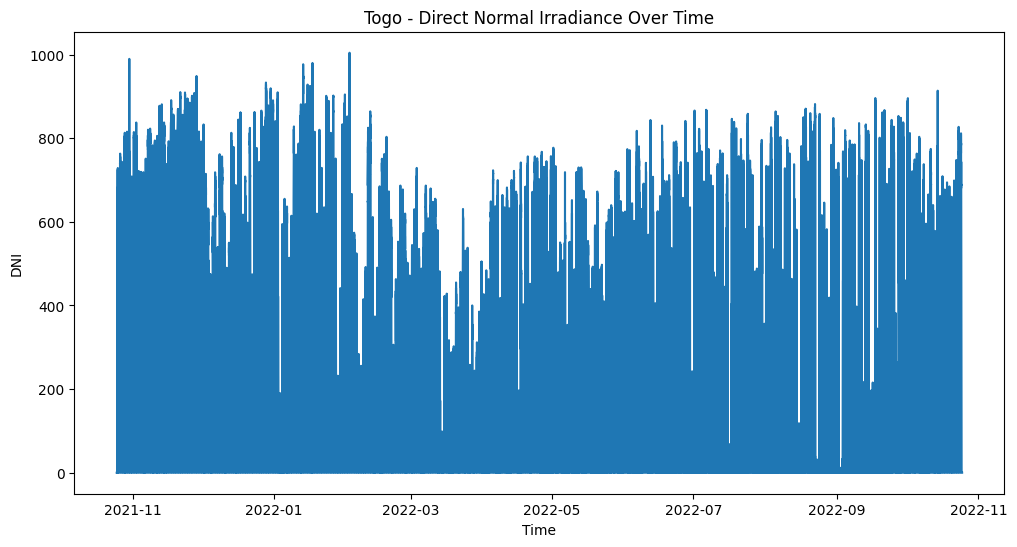

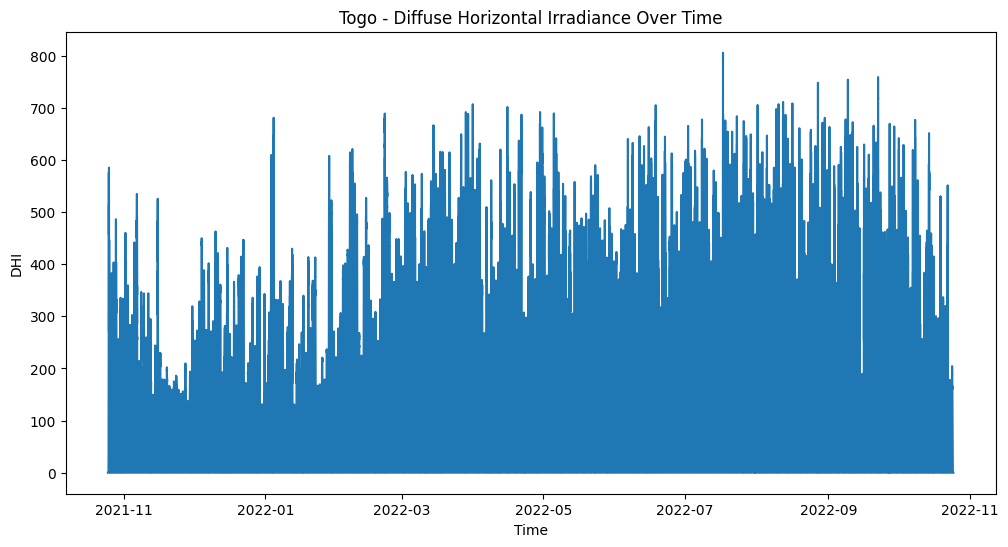

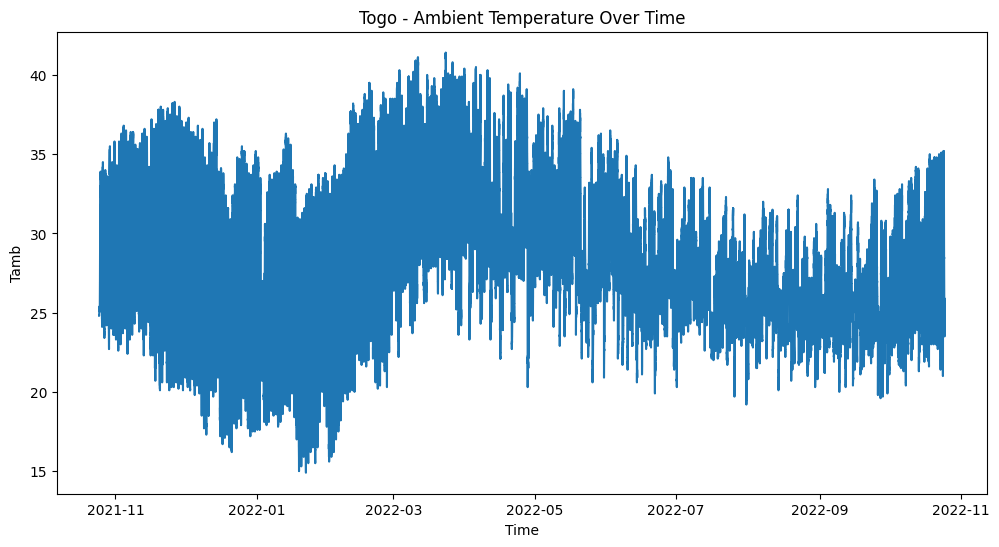

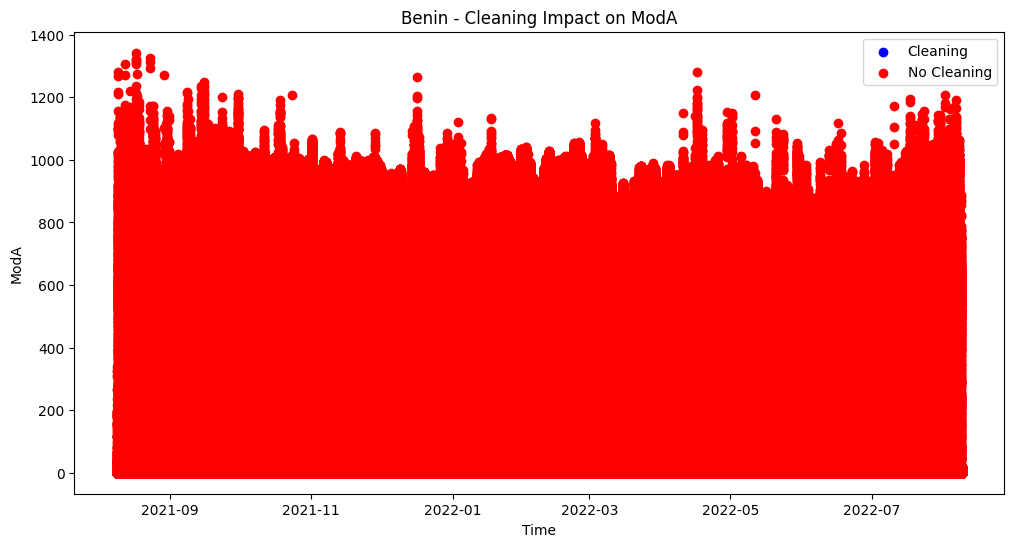

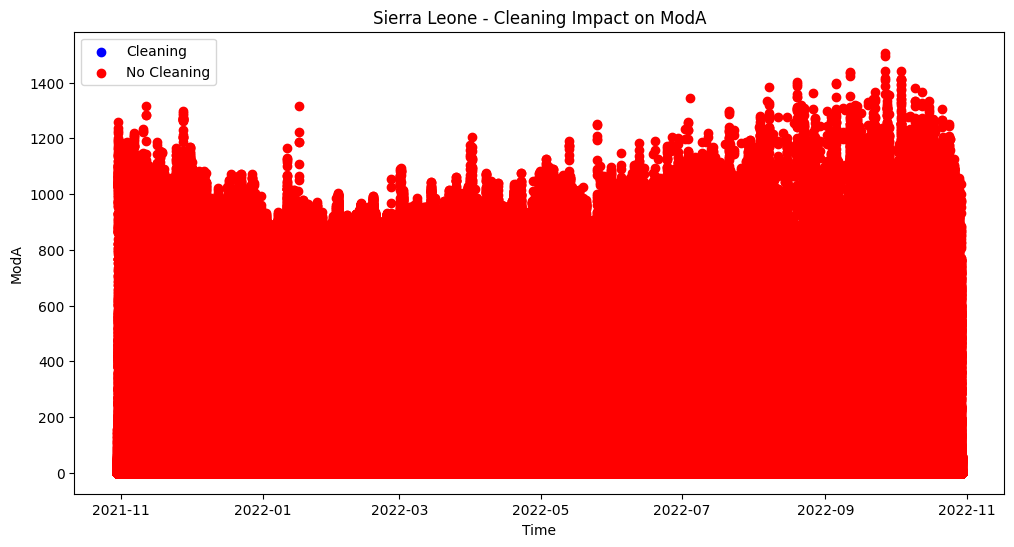

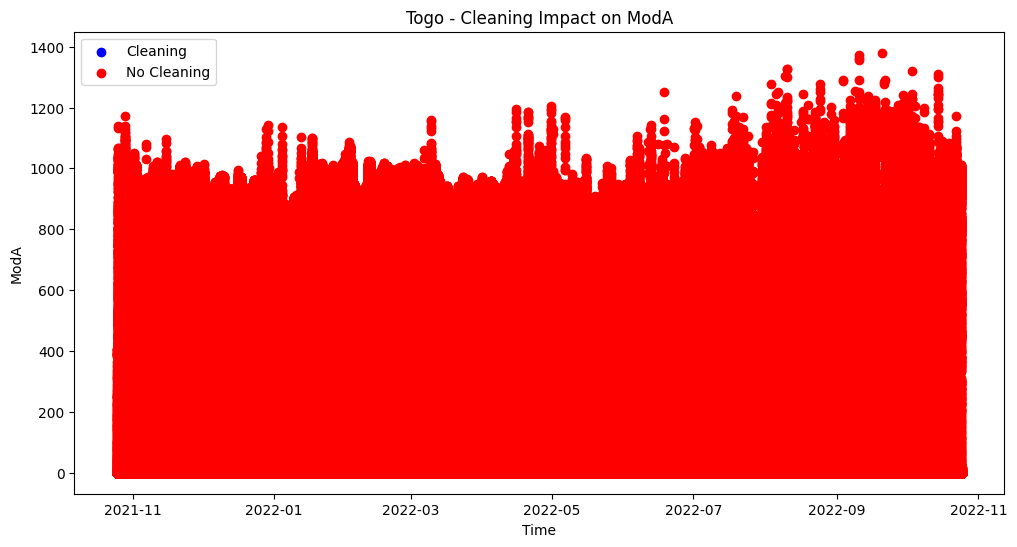

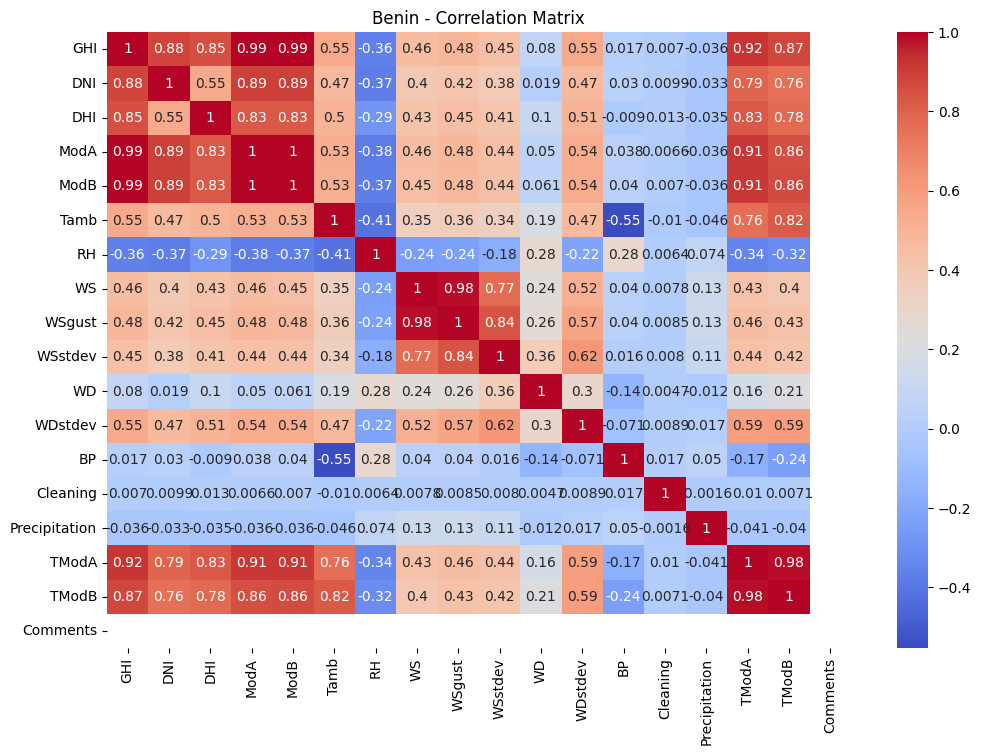

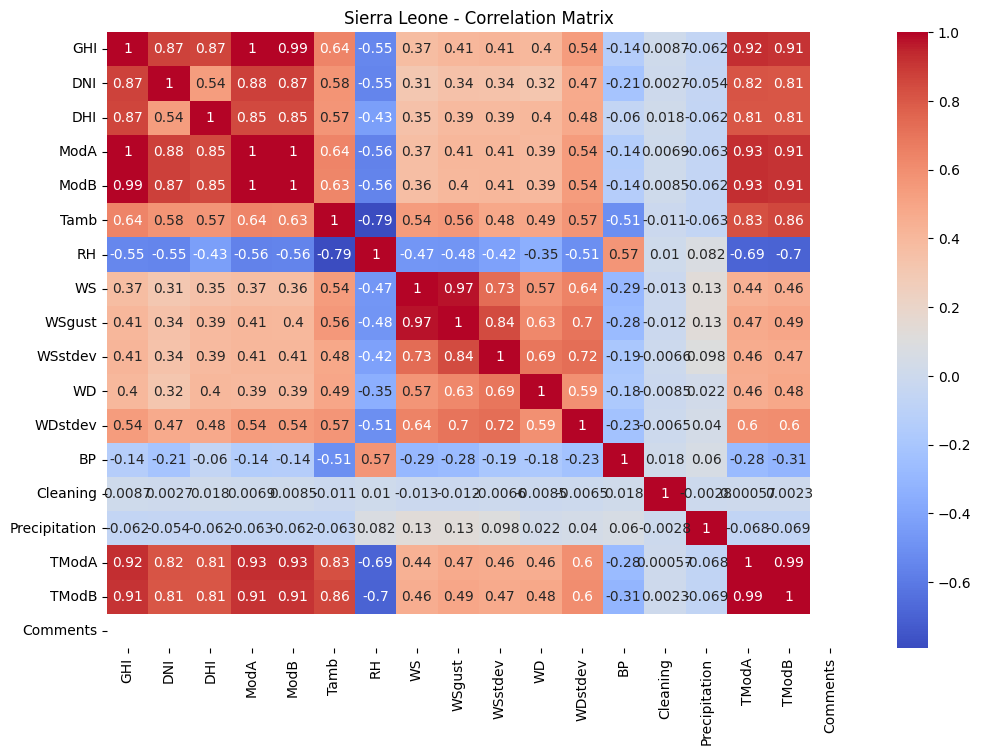

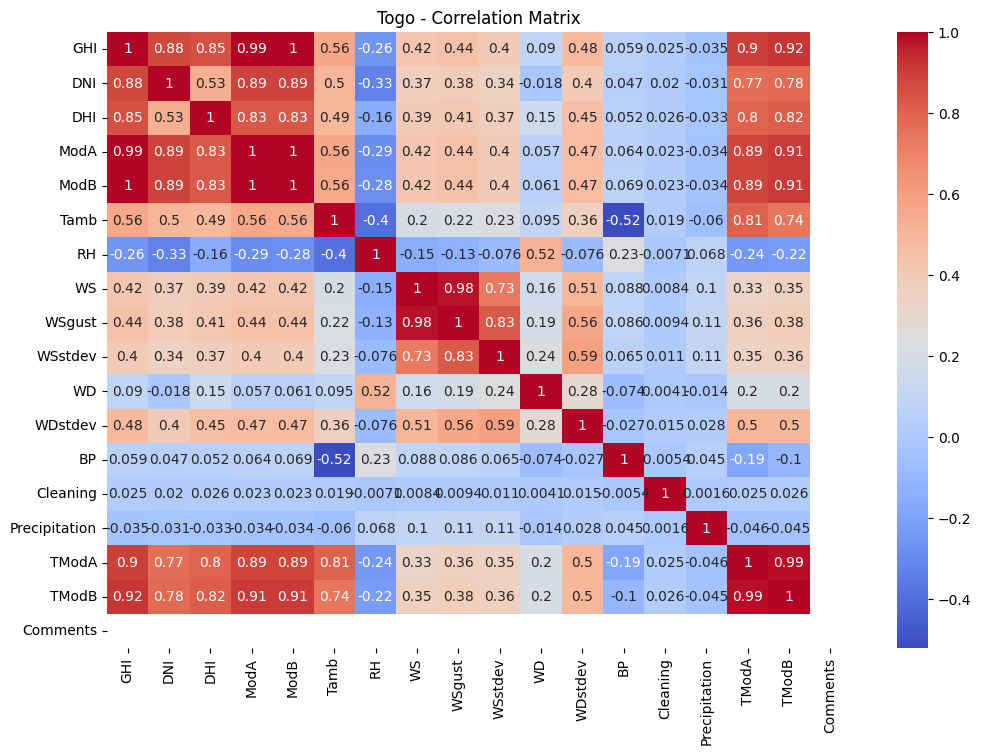

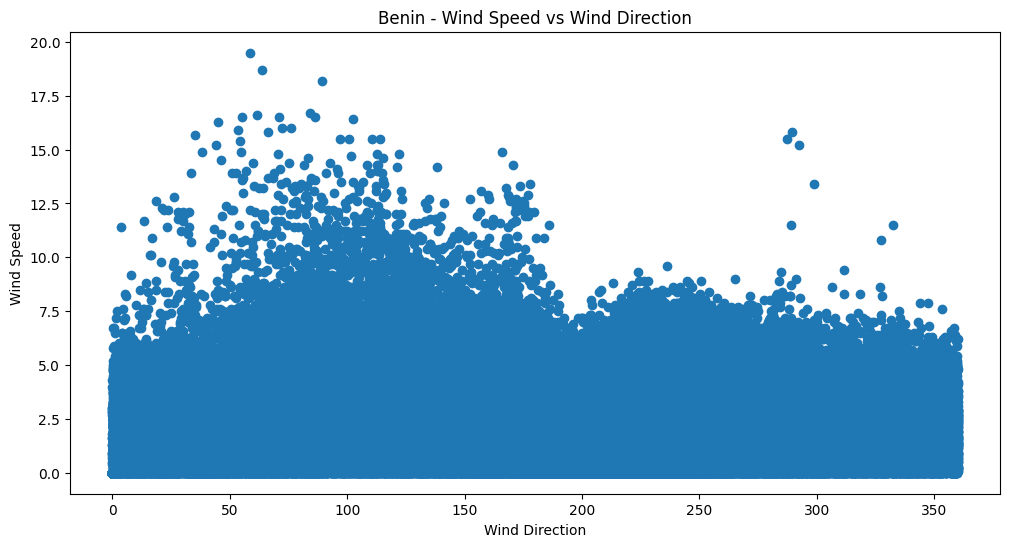

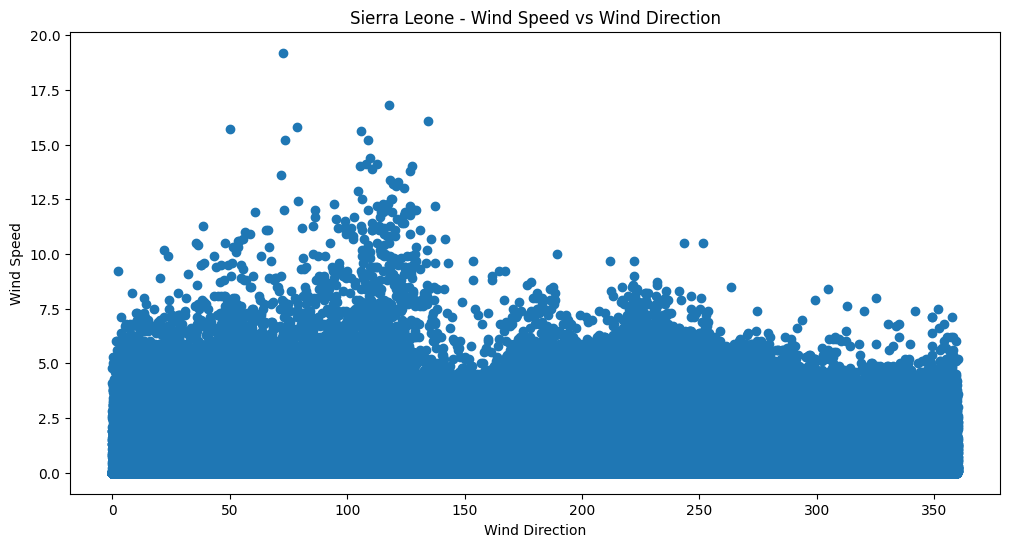

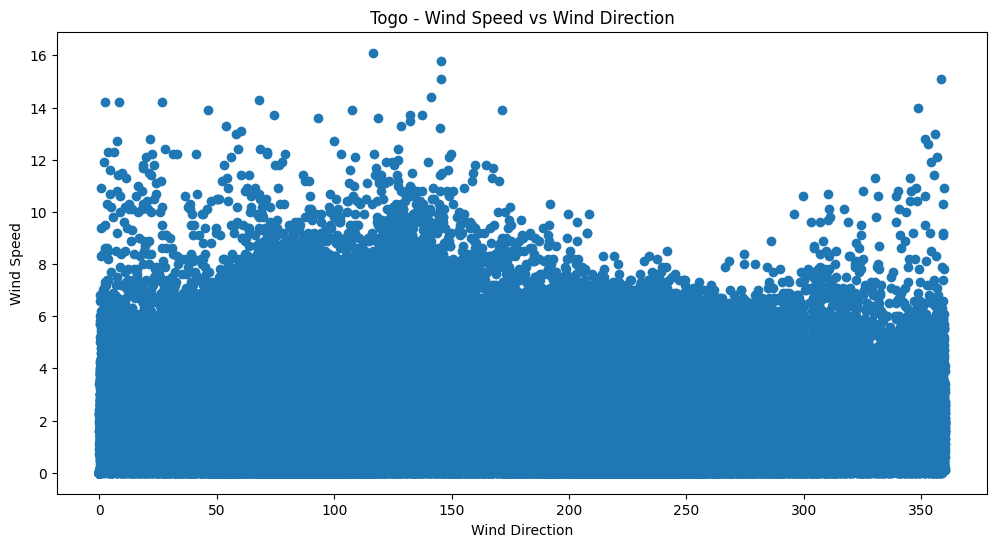

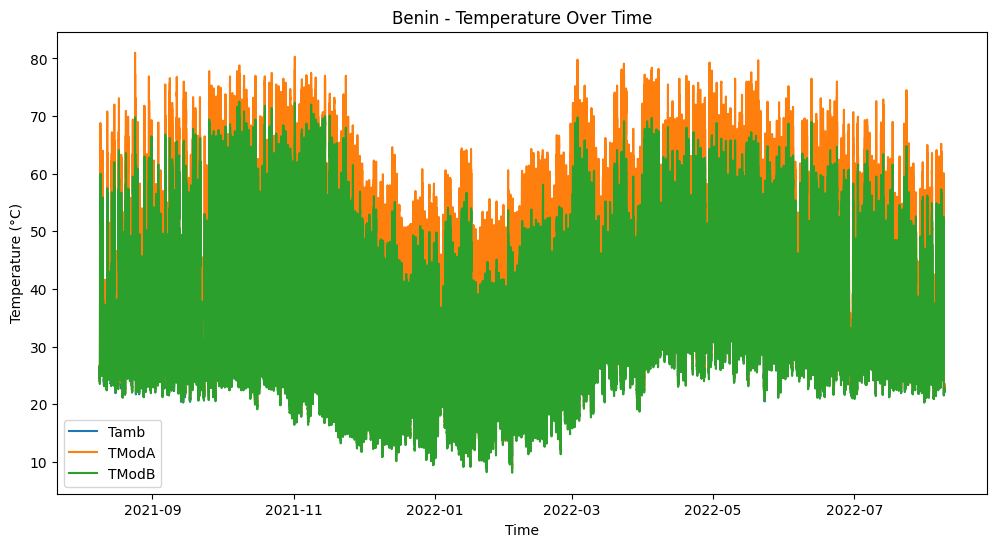

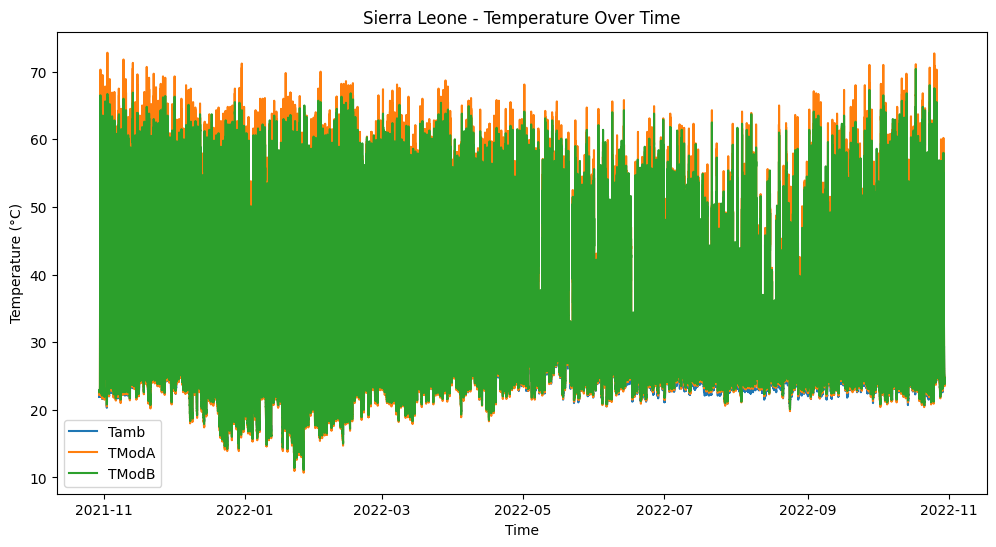

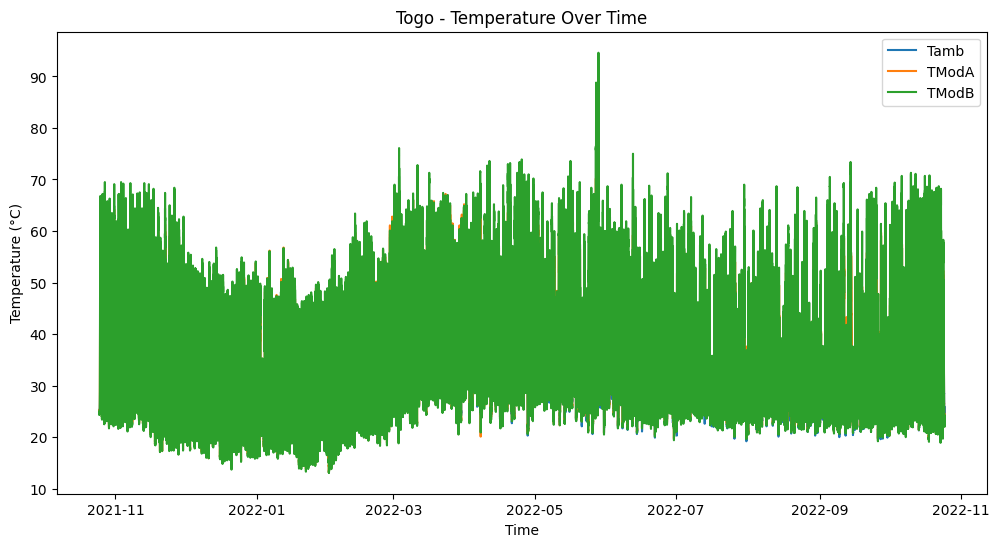

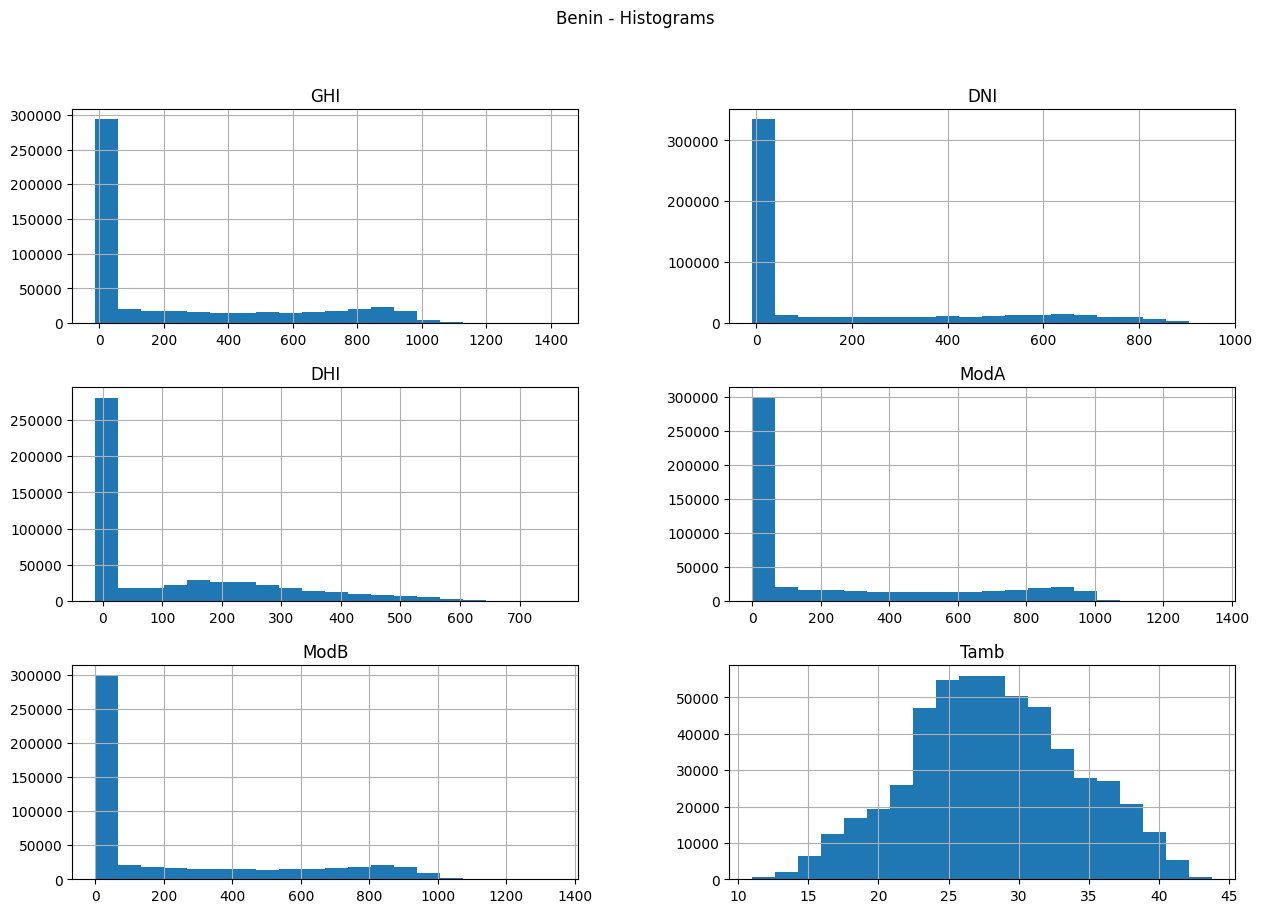

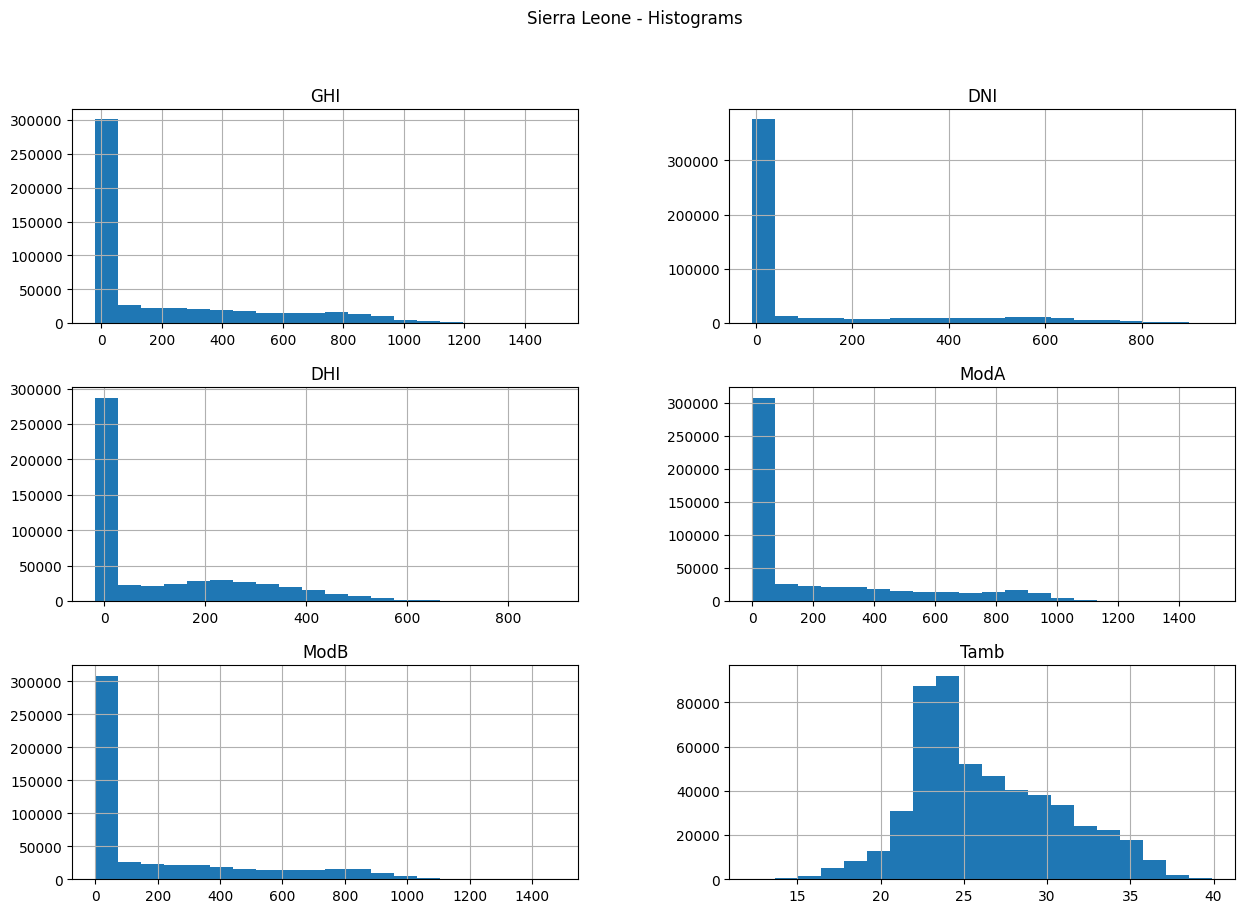

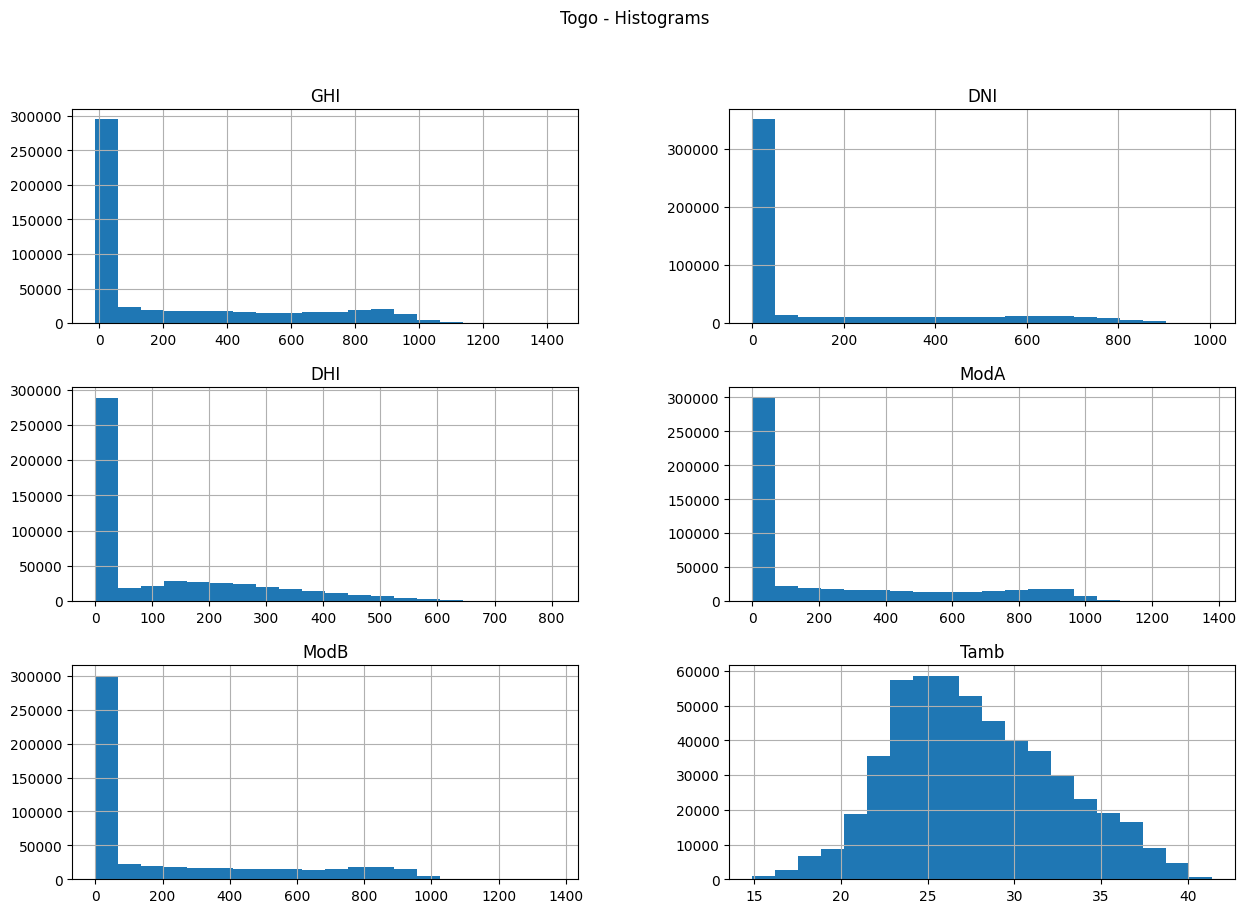

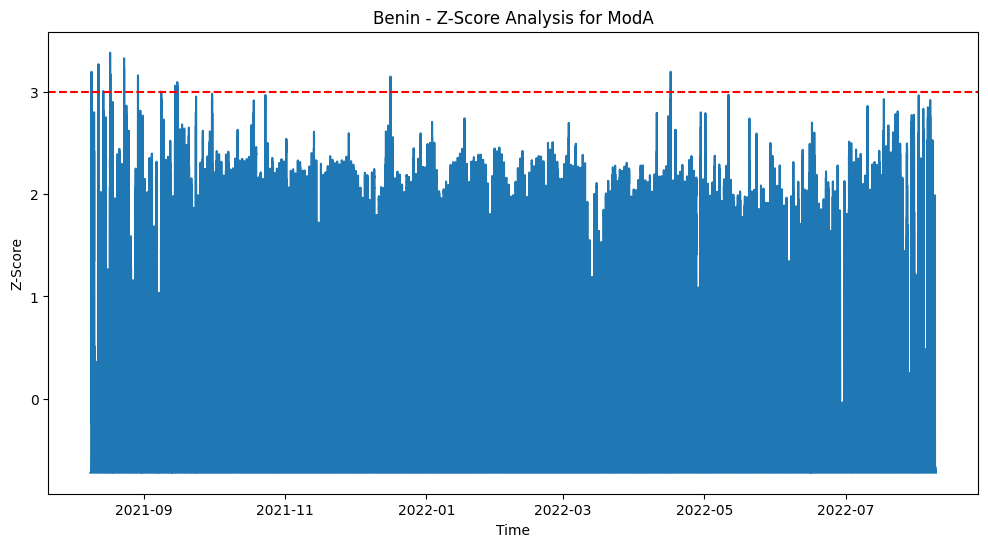

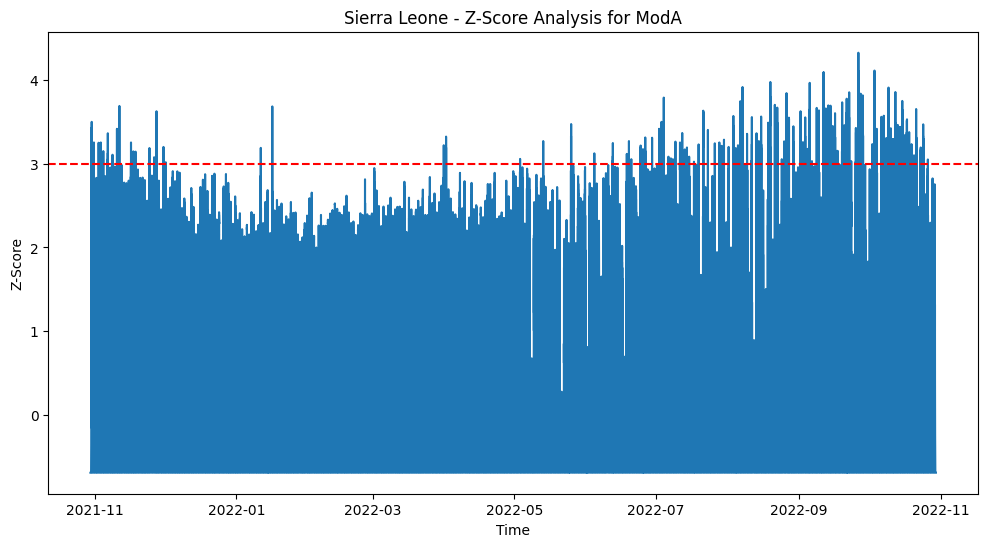

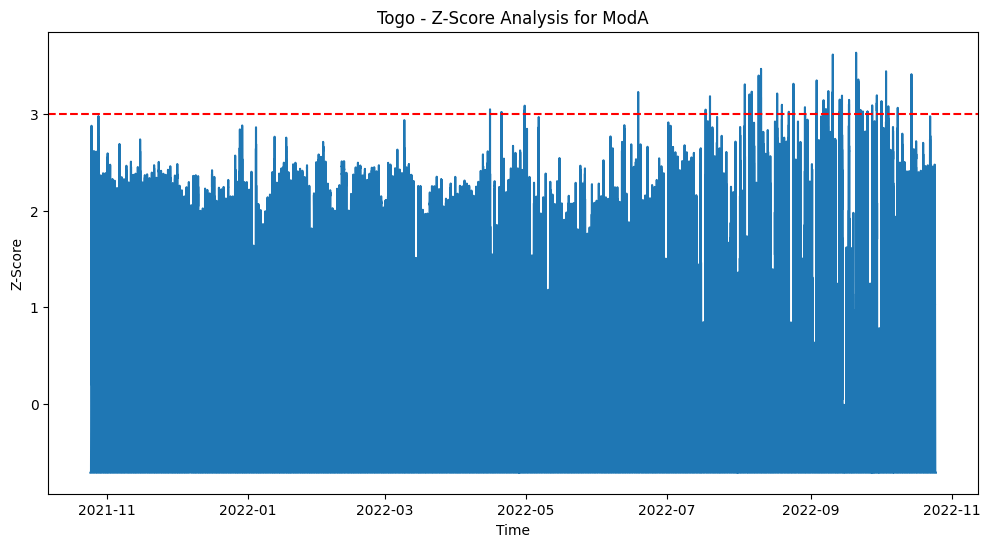

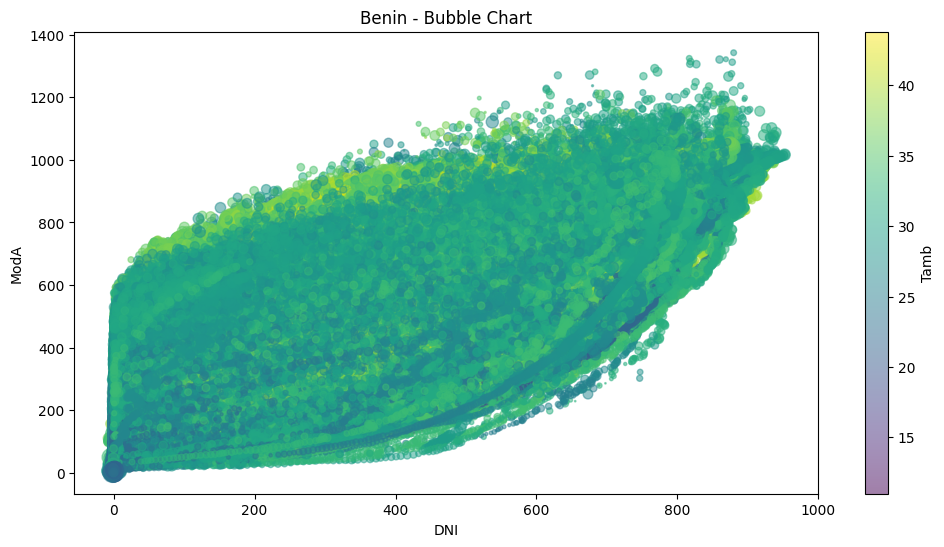

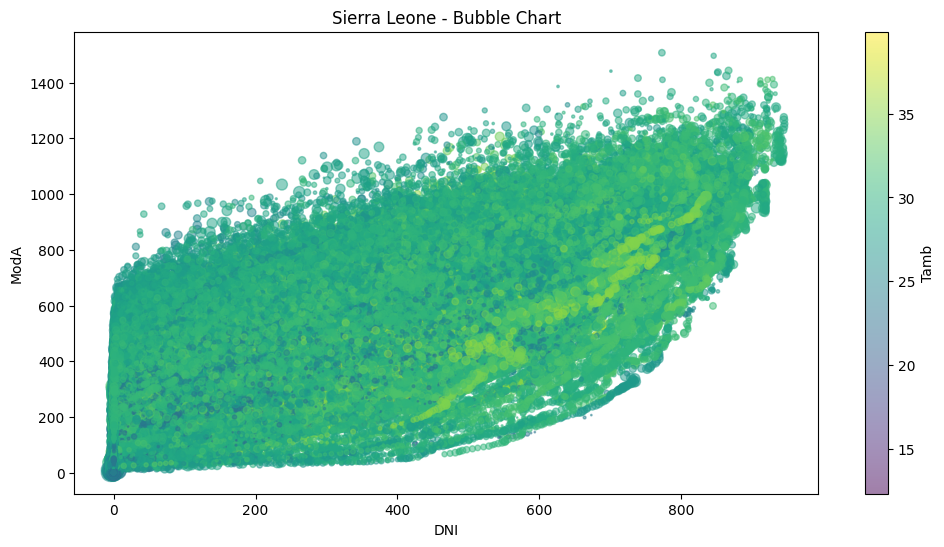

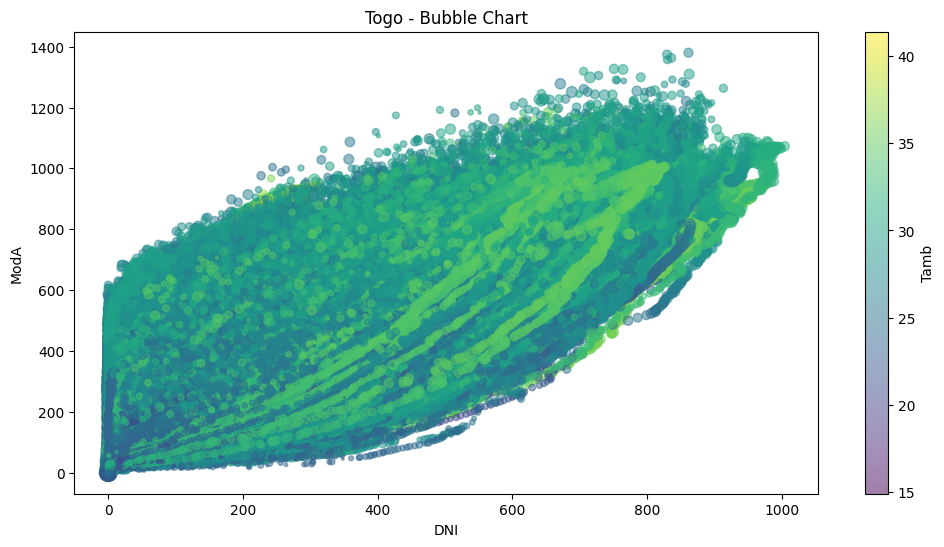

Benin Data After Cleaning:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

     zscore  
0 -0.723749  
1 -0.723749  
2 -0.723749  
3 -0.723

In [7]:
from utils.data_loading import load_data
from utils.analysis_functions import summarize_data, data_quality_check
from utils.visualization import plot_time_series, cleaning_impact_plot, correlation_analysis_plot, wind_analysis_plot, temperature_analysis_plot, histograms_plot, z_score_analysis_plot, bubble_chart_plot
from utils.cleaning import clean_data

# Load the data
benin_data = load_data('../data/benin-malanville.csv')
sierraleone_data = load_data('../data/sierraleone-bumbuna.csv')
togo_data = load_data('../data/togo-dapaong_qc.csv')

# Summary statistics
print("Benin Summary Statistics:\n",summarize_data(benin_data))
print("Sierra Leone Summary Statistics:\n",summarize_data(sierraleone_data))
print("Togo Summary Statistics:\n",summarize_data(togo_data))
# Data quality check
benin_missing, benin_negatives = data_quality_check(benin_data)
sierraleone_missing, sierraleone_negatives = data_quality_check(sierraleone_data)
togo_missing, togo_negatives = data_quality_check(togo_data)

print(benin_missing, benin_negatives)
print(sierraleone_missing, sierraleone_negatives)
print(togo_missing, togo_negatives)

# Time series analysis
columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb']
titles = ['Sensor Timestamp take','Global Horizontal Irradiance Over Time', 'Direct Normal Irradiance Over Time', 'Diffuse Horizontal Irradiance Over Time', 'Ambient Temperature Over Time']
df_dict = {'Benin': benin_data, 'Sierra Leone': sierraleone_data, 'Togo': togo_data}

plot_time_series(df_dict, columns, titles)

# Impact of cleaning on sensor readings
cleaning_impact_plot(benin_data, 'ModA', 'Benin')
cleaning_impact_plot(sierraleone_data, 'ModA', 'Sierra Leone')
cleaning_impact_plot(togo_data, 'ModA', 'Togo')

# Correlation analysis
correlation_analysis_plot(benin_data, 'Benin')
correlation_analysis_plot(sierraleone_data, 'Sierra Leone')
correlation_analysis_plot(togo_data, 'Togo')

# Wind analysis
wind_analysis_plot(benin_data, 'Benin')
wind_analysis_plot(sierraleone_data, 'Sierra Leone')
wind_analysis_plot(togo_data, 'Togo')

# Temperature analysis
temperature_analysis_plot(benin_data, 'Benin')
temperature_analysis_plot(sierraleone_data, 'Sierra Leone')
temperature_analysis_plot(togo_data, 'Togo')

# Histograms
columns_to_plot = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']
histograms_plot(benin_data, columns_to_plot, 'Benin')
histograms_plot(sierraleone_data, columns_to_plot, 'Sierra Leone')
histograms_plot(togo_data, columns_to_plot, 'Togo')

# Z-score analysis
z_score_analysis_plot(benin_data, 'ModA', 'Benin')
z_score_analysis_plot(sierraleone_data, 'ModA', 'Sierra Leone')
z_score_analysis_plot(togo_data, 'ModA', 'Togo')

# Bubble charts
bubble_chart_plot(benin_data, 'DNI', 'ModA', 'WS', 'Tamb', 'Benin')
bubble_chart_plot(sierraleone_data, 'DNI', 'ModA', 'WS', 'Tamb', 'Sierra Leone')
bubble_chart_plot(togo_data, 'DNI', 'ModA', 'WS', 'Tamb', 'Togo')

# Data cleaning
benin_data_cleaned = clean_data(benin_data)
sierraleone_data_cleaned = clean_data(sierraleone_data)
togo_data_cleaned = clean_data(togo_data)

print("Benin Data After Cleaning:\n", benin_data_cleaned.head())
print("Sierra Leone Data After Cleaning:\n", sierraleone_data_cleaned.head())
print("Togo Data After Cleaning:\n", togo_data_cleaned.head())
